<a href="https://colab.research.google.com/github/singhsweta/Python-EDA/blob/main/Unicorn%20Investment%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [30]:
startup_df=pd.read_csv('Startups in 2021 end.csv')

In [31]:
startup_df.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [32]:
startup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        936 non-null    int64 
 1   Company           936 non-null    object
 2   Valuation ($B)    936 non-null    object
 3   Date Joined       936 non-null    object
 4   Country           936 non-null    object
 5   City              921 non-null    object
 6   Industry          936 non-null    object
 7   Select Investors  935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [33]:
startup_df.drop('Unnamed: 0',axis=1,inplace=True)

In [34]:
startup_df['Valuation ($B)']=startup_df['Valuation ($B)'].str.replace('$','')




In [35]:
startup_df['Valuation ($B)']=startup_df['Valuation ($B)'].astype(float)


In [36]:
startup_df['Date Joined']=pd.to_datetime(startup_df['Date Joined'],format="%m/%d/%Y")

In [150]:
startup_df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Year
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2014
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2011
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",2018


In [38]:
startup_df['Year']=startup_df["Date Joined"].dt.year

In [60]:
df=pd.concat([startup_df,startup_df['Select Investors'].str.split(",",expand=True)],axis=1).drop("Select Investors",axis=1)
#When using expand=True , the split elements will expand out into separate columns.

In [63]:
df=df.rename({0:"Investor 1",1:"Investor 2",2:"Investor 3",3:"Investor 4"},axis=1)
df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Year,Investor 1,Investor 2,Investor 3,Investor 4
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,2017,Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,2012,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,None
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,2014,Khosla Ventures,LowercaseCapital,capitalG,None
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,2011,Institutional Venture Partners,Sequoia Capital,General Atlantic,None
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,2018,Sequoia Capital China,Blackbird Ventures,Matrix Partners,None


## The Total Amount of Investment by Countries 2007 to 2021

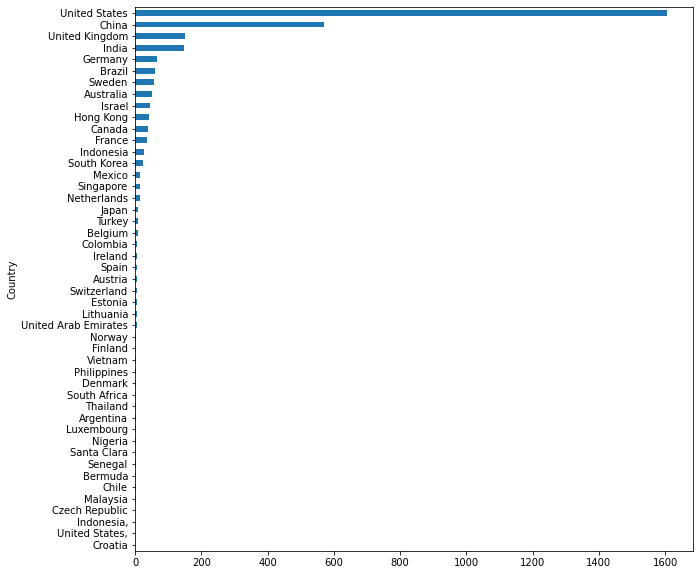

In [66]:
df.groupby('Country')['Valuation ($B)'].sum().sort_values().plot.barh(figsize=(10,10))

## Total Amount Invested In Each Year

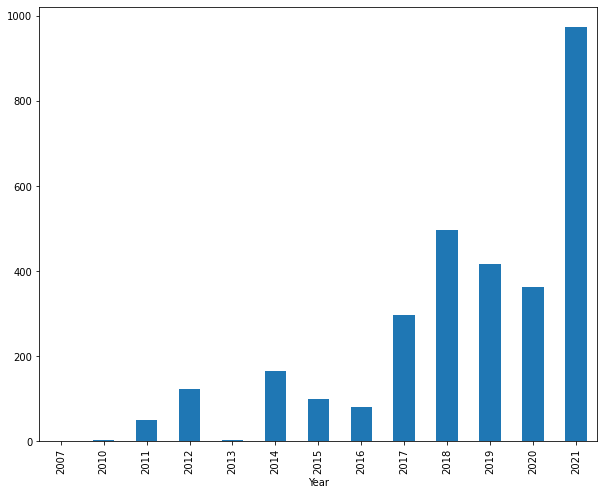

In [99]:
df.groupby('Year')['Valuation ($B)'].sum().plot.bar(figsize=(10,8))

## Number of Investments Made Each Year

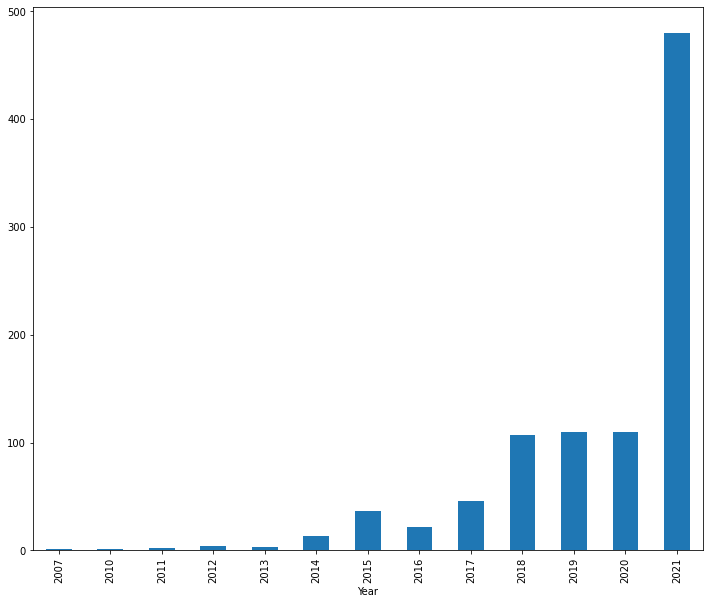

In [115]:
df.groupby("Year")['Valuation ($B)'].count().plot.bar(figsize=(12,10))


## The Average Amount Invested by years 2007 to 2021

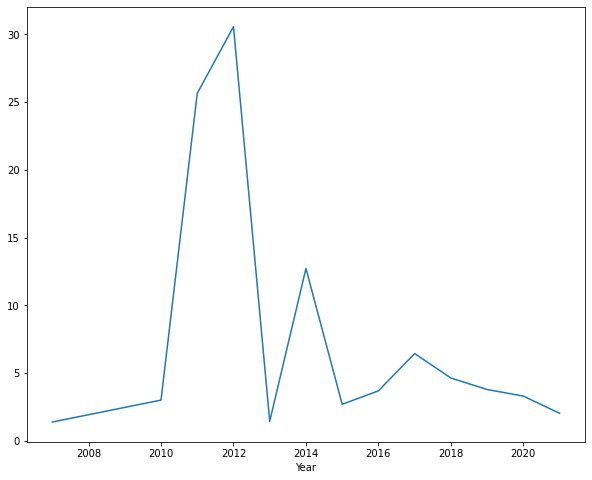

In [100]:
df.groupby('Year')['Valuation ($B)'].mean().plot(figsize=(10,8))

## Total Amount of Investment by Cities 2007 to 2021

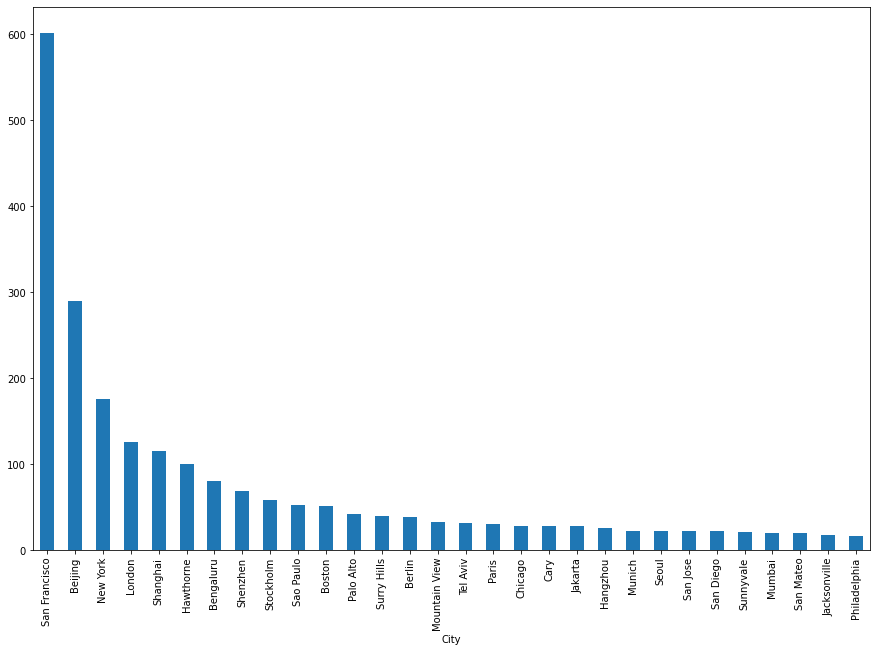

In [111]:
df.groupby("City")["Valuation ($B)"].sum().sort_values(ascending=False).head(30).plot.bar(figsize=(15,10))

## Total Amount of Investment by Industries 2007 to 2021

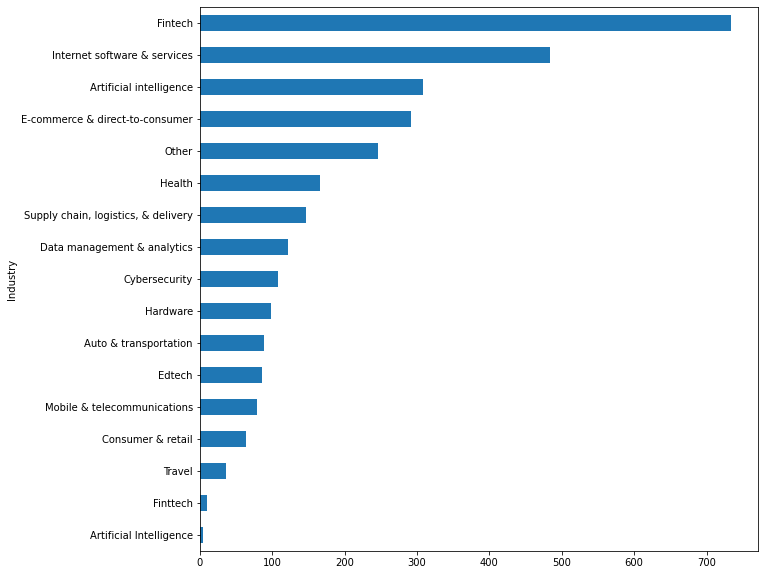

In [112]:
df.groupby("Industry")['Valuation ($B)'].sum().sort_values().plot.barh(figsize=(10,10))

## Number of Investments Made by Investors

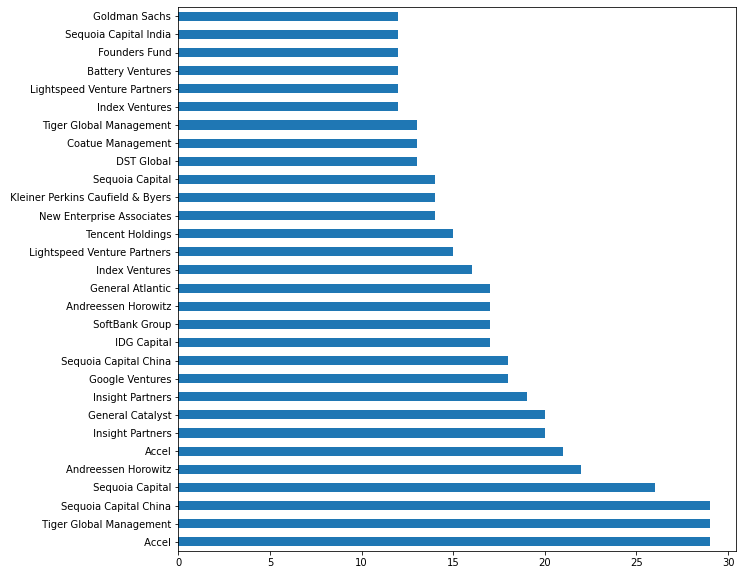

In [139]:
investors=pd.concat([df['Investor 1'],df['Investor 2'],df['Investor 3'],df['Investor 4']])

investors.value_counts().sort_values(ascending=False).head(30).plot.barh(figsize=(10,10))

## Number of Investments Made Each Year By USA,UK,India,China

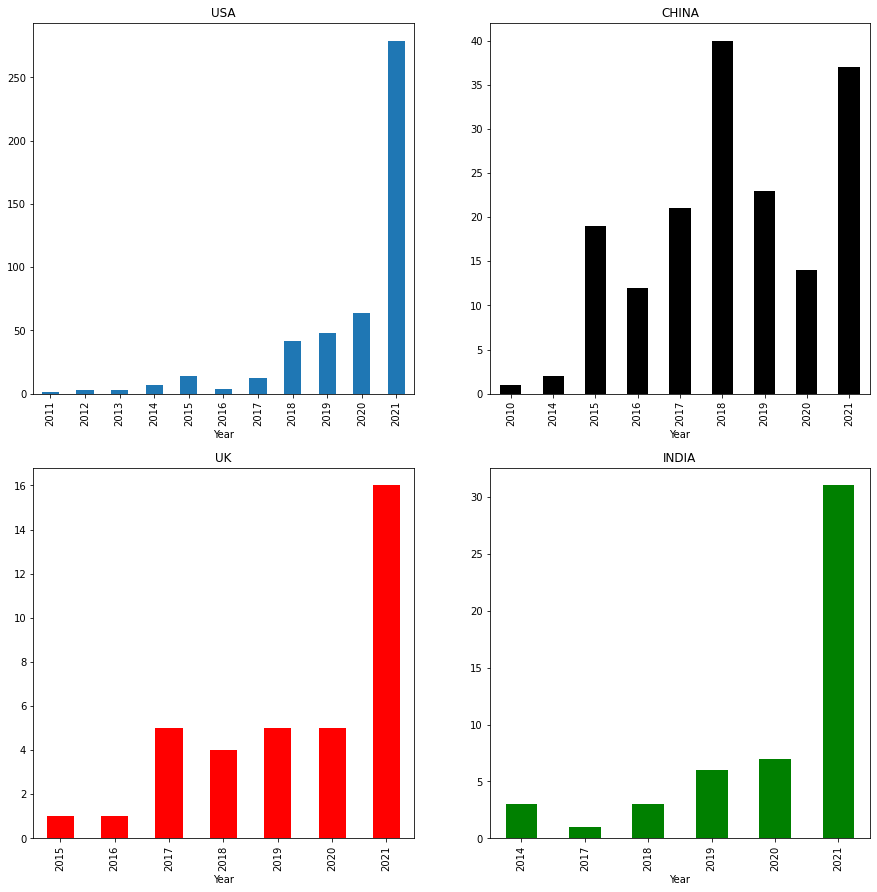

In [149]:
df_usa=df[df["Country"]=="United States"]
df_china=df[df["Country"]=="China"]
df_uk=df[df["Country"]=="United Kingdom"]
df_india=df[df["Country"]=="India"]

plt.subplot(2, 2, 1)
df_usa.groupby("Year")["Valuation ($B)"].count().plot.bar(figsize=(15,15))
plt.title("USA")

plt.subplot(2, 2, 2)
df_china.groupby("Year")["Valuation ($B)"].count().plot.bar(figsize=(15,15),color="black")
plt.title("CHINA")

plt.subplot(2, 2, 3)
df_uk.groupby("Year")["Valuation ($B)"].count().plot.bar(figsize=(15,15),color="r")
plt.title("UK")

plt.subplot(2, 2, 4)
df_india.groupby("Year")["Valuation ($B)"].count().plot.bar(figsize=(15,15),color="g")
plt.title("INDIA")

plt.show()
